<div class="alert alert-info"> 
<b>Student's comment</b> 
    
Hello, Dmitry! <br>
Unfortunately, I wasn't able to save your commentary while uploading the notebook.<br> Is it available now?
</div>

# Product Range Analysis

## Project description:
In this project I have full data on sales entries for a period that covers roughly a year (from 11.2018 to 12.2019). My main assignment is to analyze product range. For this, I plan to:
* Identify common features that distinguish most and least successful products from the others.
* Sort products by categories using machine learning model.
In the end, I will conduct the statistical data analysis to check whether my conclusions can be proved scientifically.

## Table of contents

1. [Load the data](#Load-the-data)
2. [Preprocess the data](#Preprocess-the-data)
3. [Exploratory data analysis](#Exploratory-Data-Analysis)
4. Product Analysis:  [Variety-based](#Sort-products-by-categories:-variety-based.) | [Description-based](#Sort-products-by-categories:-description-based.) | [ML clustering](#Build-machine-learning-model-to-categorize-items-into-clusters) 
5. [Statistical data analysis](#Statistical-data-analysis)
6. [Conclusion](#Conclusion)

In [1]:
# libraries cell

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from statistics import mean, median
from scipy import stats as st


# Load the Data
## Pre-load first 500 rows, check the size of the sample and data types.

In [2]:
try: # locally
    data_demo = pd.read_csv('datasets/ecommerce_dataset_us.csv', sep = '\t', nrows = 500)
except: # globally
    data_demo = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep = '\t', nrows = 500)

In [3]:
data_demo.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    500 non-null    object 
 1   StockCode    500 non-null    object 
 2   Description  500 non-null    object 
 3   Quantity     500 non-null    int64  
 4   InvoiceDate  500 non-null    object 
 5   UnitPrice    500 non-null    float64
 6   CustomerID   500 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 149.6 KB


In [4]:
data_demo.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850


##  Convert data types to relevant formats and check again the sample size

In [5]:
# check if there are columns than can be converted to category type
print('Amount of unique values in StockCode is {} out of 500.'.format(len(data_demo['StockCode'].unique())))
print('Amount of unique values in CustomerId is {} out of 500.'.format(len(data_demo['CustomerID'].unique())))

Amount of unique values in StockCode is 339 out of 500.
Amount of unique values in CustomerId is 31 out of 500.


In [6]:
# convert 'InvoiceDate' to datetime:
data_demo['InvoiceDate'] = pd.to_datetime(data_demo['InvoiceDate'], format = '%m/%d/%Y %H:%M')

In [7]:
# convert 'customer id' to int:
data_demo['CustomerID'] = data_demo['CustomerID'].astype('int')

In [8]:
data_demo.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    500 non-null    object        
 1   StockCode    500 non-null    object        
 2   Description  500 non-null    object        
 3   Quantity     500 non-null    int64         
 4   InvoiceDate  500 non-null    datetime64[ns]
 5   UnitPrice    500 non-null    float64       
 6   CustomerID   500 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 115.9 KB


## Load the full dataset with corrected column types

In [9]:
try: # locally
    data = pd.read_csv('datasets/ecommerce_dataset_us.csv', 
                       sep = '\t', 
                       parse_dates = ['InvoiceDate'], 
                       dtype = {'CustomerID':'Int32'})
except: # globally
    data = pd.read_csv('/datasets/ecommerce_dataset_us.csv', 
                       sep = '\t', 
                       parse_dates = ['InvoiceDate'], 
                       dtype = {'CustomerID':'Int32'})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  Int32         
dtypes: Int32(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.4+ MB


[Table of contents](#Table-of-contents)

# Preprocess the Data
## Check category names and change/convert them if needed

In [11]:
data = data.rename(columns = {
    'InvoiceNo': 'invoice', 'StockCode': 'stock_code', 'Description': 'description', 'Quantity': 'quantity', 
    'InvoiceDate': 'invoice_date', 'UnitPrice': 'unit_price', 'CustomerID': 'customer_id'})

## Check format of string columns, convert to readable format

In [12]:
data['description'] = data['description'].str.lower()

In [13]:
data.head()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17850


## Check abnormal data: missing values, duplicates, outliers

In [14]:
# check for duplicates
print('There are {} ({:.2%}) duplicated rows.'.format(
    data.duplicated().sum(),
    data.duplicated().sum() / len(data)))

There are 5268 (0.97%) duplicated rows.


In [15]:
# remove duplicates:
data = data.drop_duplicates()

In [16]:
# check for missing values:
data.isna().sum()

invoice              0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135037
dtype: int64

In [17]:
# look at the rows without description:
data.query('description != description').head()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,<NA>
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,<NA>
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,<NA>
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,<NA>
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,<NA>


In [18]:
# check if all of them don't have price:
len(data.query('description != description & unit_price > 0'))

0

In [19]:
# check share of rows with no description:
print('Rows with no description: {:.2%} of the data.'.format(
    len(data.query('description != description')) / len(data)))


Rows with no description: 0.27% of the data.


In [20]:
# remove those rows:
data = data.query('description == description')

In [21]:
# check share of missing 'customer_id' values:
print('There are {:.2%} of customer ids missing.'.format(data['customer_id'].isna().sum() / len(data)))

There are 24.96% of customer ids missing.


In [22]:
data['customer_id'] = data['customer_id'].fillna(0)

In [23]:
# describe the numeric columns
data.describe(datetime_is_numeric = True)

,quantity,invoice_date,unit_price,customer_id
count,535187.000000,535187,535187.000000,535187.000000
mean,9.671593,2019-07-02 11:43:44.485273344,4.645242,11466.973804
min,-80995.000000,2018-11-29 08:26:00,-11062.060000,0.000000
25%,1.000000,2019-03-26 11:34:00,1.250000,12348.000000
50%,3.000000,2019-07-17 15:38:00,2.080000,14360.000000
75%,10.000000,2019-10-17 08:20:00,4.130000,16242.000000
max,80995.000000,2019-12-07 12:50:00,38970.000000,18287.000000
std,219.059056,NaN,97.364810,6778.037985


In [24]:
# check negative values in 'quantity' column:
data.query('quantity < 0').head()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id
141,C536379,D,discount,-1,2018-11-29 09:41:00,27.50,14527
154,C536383,35004C,set of 3 coloured flying ducks,-1,2018-11-29 09:49:00,4.65,15311
235,C536391,22556,plasters in tin circus parade,-12,2018-11-29 10:24:00,1.65,17548
236,C536391,21984,pack of 12 pink paisley tissues,-24,2018-11-29 10:24:00,0.29,17548
237,C536391,21983,pack of 12 blue paisley tissues,-24,2018-11-29 10:24:00,0.29,17548


In [25]:
# check one customer with negative values to see if those can be explained by cancelled (for any reason) invoices:
data[data['customer_id'] == 17548]

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id
235,C536391,22556,plasters in tin circus parade,-12,2018-11-29 10:24:00,1.65,17548
236,C536391,21984,pack of 12 pink paisley tissues,-24,2018-11-29 10:24:00,0.29,17548
237,C536391,21983,pack of 12 blue paisley tissues,-24,2018-11-29 10:24:00,0.29,17548
238,C536391,21980,pack of 12 red retrospot tissues,-24,2018-11-29 10:24:00,0.29,17548
239,C536391,21484,chick grey hot water bottle,-12,2018-11-29 10:24:00,3.45,17548
240,C536391,22557,plasters in tin vintage paisley,-12,2018-11-29 10:24:00,1.65,17548
241,C536391,22553,plasters in tin skulls,-24,2018-11-29 10:24:00,1.65,17548
165024,550755,22585,pack of 6 birdy gift tags,24,2019-04-18 12:01:00,1.25,17548
165025,550755,22082,ribbon reel stripes design,10,2019-04-18 12:01:00,1.65,17548
165026,550755,22081,ribbon reel flora + fauna,10,2019-04-18 12:01:00,1.65,17548


In [26]:
# check the highest negative value:
data.sort_values('quantity').head(10)

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id
540422,C581484,23843,"paper craft , little birdie",-80995,2019-12-07 09:27:00,2.08,16446
61624,C541433,23166,medium ceramic top storage jar,-74215,2019-01-16 10:17:00,1.04,12346
225530,556691,23005,printing smudges/thrown away,-9600,2019-06-12 10:37:00,0.00,0
225529,556690,23005,printing smudges/thrown away,-9600,2019-06-12 10:37:00,0.00,0
4287,C536757,84347,rotating silver angels t-light hldr,-9360,2018-11-30 14:23:00,0.03,15838
225528,556687,23003,printing smudges/thrown away,-9058,2019-06-12 10:36:00,0.00,0
115818,546152,72140F,throw away,-5368,2019-03-07 17:25:00,0.00,0
431381,573596,79323W,"unsaleable, destroyed.",-4830,2019-10-29 15:17:00,0.00,0
160145,C550456,21108,fairy cake flannel assorted colour,-3114,2019-04-16 13:08:00,2.10,15749
263884,560039,20713,wrongly marked. 23343 in box,-3100,2019-07-12 14:27:00,0.00,0


In [27]:
# check orders of customer who have highest negative quantity, to see if it also was cancelled:
data[data['customer_id'] == 16446]

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id
194354,553573,22980,pantry scrubbing brush,1,2019-05-16 09:52:00,1.65,16446
194355,553573,22982,pantry pastry brush,1,2019-05-16 09:52:00,1.25,16446
540421,581483,23843,"paper craft , little birdie",80995,2019-12-07 09:15:00,2.08,16446
540422,C581484,23843,"paper craft , little birdie",-80995,2019-12-07 09:27:00,2.08,16446


In [28]:
# check how many negative quantity values are there:
print('There are {} ({:.2%}) negative quantity values.'.format(
    len(data.query('quantity < 0')), 
    len(data.query('quantity < 0')) / len(data)))

There are 9725 (1.82%) negative quantity values.


In [29]:
# see how many discounts are there:
print('There are {} ({:.2%}) discounts. {} of them have negative quantity values.'.format(
    len(data.query('stock_code == "D"')), 
    len(data.query('stock_code == "D"')) / len(data), 
    len(data.query('stock_code == "D" & quantity < 0'))))

There are 77 (0.01%) discounts. 77 of them have negative quantity values.


In [30]:
data['quantity'].sort_values(ascending = False)

540421    80995
61619     74215
502122    12540
421632     4800
206121     4300
          ...  
4287      -9360
225529    -9600
225530    -9600
61624    -74215
540422   -80995
Name: quantity, Length: 535187, dtype: int64

In [31]:
# check prices with value of 0:
print('Total of {} ({:.2%}) units do not have a price.'.format(
    len(data.query('unit_price == 0')), len(data.query('unit_price == 0')) / len(data)))

data.query('unit_price == 0').head(10)

Total of 1056 (0.20%) units do not have a price.


,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id
6391,536941,22734,amazon,20,2018-12-01 12:08:00,0.0,0
6392,536942,22139,amazon,15,2018-12-01 12:08:00,0.0,0
7313,537032,21275,?,-30,2018-12-01 16:50:00,0.0,0
9302,537197,22841,round cake tin vintage green,1,2018-12-03 14:02:00,0.0,12647
13217,537425,84968F,check,-20,2018-12-04 15:35:00,0.0,0
13218,537426,84968E,check,-35,2018-12-04 15:36:00,0.0,0
13264,537432,35833G,damages,-43,2018-12-04 16:10:00,0.0,0
14335,537534,85064,cream sweetheart letter rack,1,2018-12-05 11:48:00,0.0,0
14336,537534,84832,zinc willie winkie candle stick,1,2018-12-05 11:48:00,0.0,0
14337,537534,84692,box of 24 cocktail parasols,2,2018-12-05 11:48:00,0.0,0


In [32]:
# take a look at those units:
data.query('stock_code == "22841"').head()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id
2834,536592,22841,round cake tin vintage green,1,2018-11-29 17:06:00,16.13,0
3925,536738,22841,round cake tin vintage green,2,2018-11-30 13:06:00,7.95,15827
5111,536844,22841,round cake tin vintage green,2,2018-11-30 18:49:00,7.95,14236
5328,536859,22841,round cake tin vintage green,1,2018-12-01 10:43:00,7.95,12841
9302,537197,22841,round cake tin vintage green,1,2018-12-03 14:02:00,0.00,12647


In [33]:
data.query('stock_code == "22090"').head()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id
1504,536544,22090,paper bunting retrospot,1,2018-11-29 14:32:00,5.91,0
2645,536592,22090,paper bunting retrospot,1,2018-11-29 17:06:00,5.91,0
3616,536638,22090,paper bunting retrospot,6,2018-11-30 11:41:00,2.95,16244
3675,536639,22090,paper bunting retrospot,6,2018-11-30 11:45:00,2.95,15111
6512,536946,22090,paper bunting retrospot,6,2018-12-01 12:28:00,2.95,13013


In [34]:
# remove rows with no price:
data = data.query('unit_price > 0')

In [35]:
# check the higher prices:
data.sort_values('unit_price', ascending = False).head(10)

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id
222681,C556445,M,manual,-1,2019-06-08 15:31:00,38970.00,15098
524602,C580605,AMAZONFEE,amazon fee,-1,2019-12-03 11:36:00,17836.46,0
43702,C540117,AMAZONFEE,amazon fee,-1,2019-01-03 09:55:00,16888.02,0
43703,C540118,AMAZONFEE,amazon fee,-1,2019-01-03 09:57:00,16453.71,0
15017,537632,AMAZONFEE,amazon fee,1,2018-12-05 15:08:00,13541.33,0
16356,C537651,AMAZONFEE,amazon fee,-1,2018-12-05 15:49:00,13541.33,0
15016,C537630,AMAZONFEE,amazon fee,-1,2018-12-05 15:04:00,13541.33,0
16232,C537644,AMAZONFEE,amazon fee,-1,2018-12-05 15:34:00,13474.79,0
524601,C580604,AMAZONFEE,amazon fee,-1,2019-12-03 11:35:00,11586.50,0
299982,A563185,B,adjust bad debt,1,2019-08-10 14:50:00,11062.06,0


In [36]:
tech_descr = ['manual', 'amazon fee', 'adjust bad debt', 'postage', 'dotcom postage']
data.query('description not in @tech_descr').sort_values('unit_price', ascending = False).head(10)

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id
150591,C549452,D,discount,-1,2019-04-06 14:17:00,1867.86,17940
528087,C580726,CRUK,cruk commission,-1,2019-12-03 17:17:00,1100.44,14096
64573,C541653,BANK CHARGES,bank charges,-1,2019-01-18 11:50:00,1050.15,0
467437,C576338,CRUK,cruk commission,-1,2019-11-12 15:27:00,1038.75,14096
508561,C579195,CRUK,cruk commission,-1,2019-11-26 15:54:00,987.14,14096
28992,C538680,BANK CHARGES,bank charges,-1,2018-12-11 17:10:00,966.92,0
494745,C578269,CRUK,cruk commission,-1,2019-11-21 13:39:00,849.93,14096
222682,556446,22502,picnic basket wicker 60 pieces,1,2019-06-08 15:33:00,649.50,15098
222680,556444,22502,picnic basket wicker 60 pieces,60,2019-06-08 15:28:00,649.50,15098
303275,C563535,BANK CHARGES,bank charges,-1,2019-08-15 11:38:00,612.46,0


In [37]:
# update the list of technical descriptions
tech_descr = ['manual', 'amazon fee', 'adjust bad debt', 'postage', 'dotcom postage', 'cruk commission', 'bank charges']

In [38]:
# see how many rows like that I have:
print('There are {} ({:.2%}) of entries servicing inner technical purposes.'.format(
    len(data.query('description in @tech_descr')),
    len(data.query('description in @tech_descr')) / len(data)))

There are 2608 (0.49%) of entries servicing inner technical purposes.


In [39]:
# Remove rows with 'technical' descriptions:
data = data.query('description not in @tech_descr')

In [40]:
data.describe(include = 'object')

,invoice,stock_code,description
count,531521,531521,531521
unique,23282,3930,4035
top,573585,85123A,white hanging heart t-light holder
freq,1113,2295,2353


#### <font color = 'blue'>Notes:</font>
**Data main characteristics**:
* The data starts on **29.11.18** and ends on **12.07.19**. 
* There are **19789** unique invoices.
* **3916** items (unique stock codes) have **4021** descriptions - meaning that some items have different descriptions, must be due to the manual entry of the description field.



**Data preprocessing**:
* Readability: the columns were renamed, item descriptions were converted to lowercase.
<br>

* Duplicates: 5268 (0.97%) of the duplicated rows were removed.
<br>

* Missing values:
    * 1454 (0.27%) of rows with missing descriptions were removed. All of those rows also contained no price. There is obviously some error in those rows or they do not belong to the regular purchase, so they could distort the analysis of the data.
    * Almost 25% (135037) rows do not have user ID. Since this data does not belong to online store, it was expectable that the buyer registration is not a requierment for making a purchase. Also I am not needed to make an analysis by user, and if the need to analyze separate purchases will arise, I have invoices for that. The missing values was filled with 0 to prevent errors in the data.
<br>


* 9725 (1.82%) 'quantity' entries with negative values:
    * Part of them belongs to the corrected or cancelled invoices. For example, there was entry of a purchase of 80995 of paper crafts, and it followed by the same user purchasing -80995 paper crafts. Another entry had of -9600 pieces had description of "printing smudges/thrown away". There were also 'thrown away', 'unsaleable' and 'wrongly marked' entries with negative quantity spotted. 77 out of those were the discounts. 
    * Since it is very hard to separate not only all the cancelled invoices, but also their original entries, I decided to leave the negative value quantities as it is. When calculating average and total quantities per item, the original and the cancel entries will annull each other, and when looking for total revenue per item, instead of summing all the prices I will have just to multiply total items sold by average price.
<br>


* Total of 582 (0.11%) units did not have a price. I believe that those entries resulted from some kind of an error (human factor and/or technical glitch): it would be the best explanation for 20 'amazon' entries with no price or to at least 7 different purchases in a row in exact same minute, also without price. Those rows were also removed.
<br>

* All higher price outliers resulted from 'technical' entries, like 'amazon fee', 'manual' or 'postage'. Each of them also have it's own stock code, like 'AMAZONFEE' so they did not belong to any listed product. I don't see a way that those kind of values coud contribute to the analysis of product range, but they definitely can distort it due to the high outliers in prices column they create. All the 'technical' values I could locate took 2152 (0.41%) out of total data. After removing them, the highest prices in dataset look reasonable enough and they belong to real products.
<br>
<br>

[Table of contents](#Table-of-contents)

# Exploratory Data Analysis

## Add necessary calculations:

In [41]:
data['revenue'] = data['quantity'] * data['unit_price']

## Plot histograms and study distributions

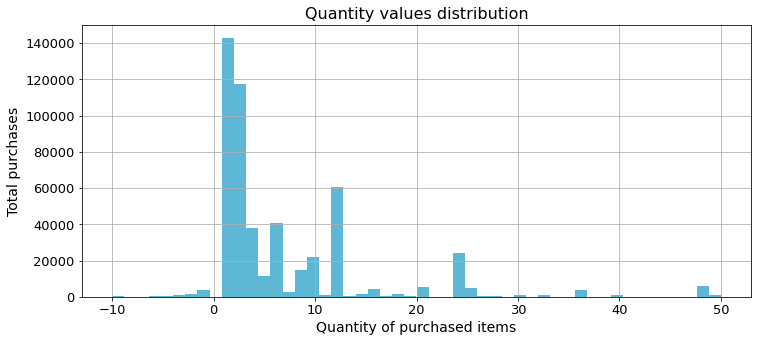

In [42]:
data['quantity'].hist(range = (-10,50), figsize = (12,5), bins = 50, color = '#5db7d5', xlabelsize = 13, ylabelsize = 13)
plt.xlabel('Quantity of purchased items', fontsize = 14)
plt.ylabel('Total purchases', fontsize = 14)
plt.title('Quantity values distribution', fontsize = 16)
plt.show()

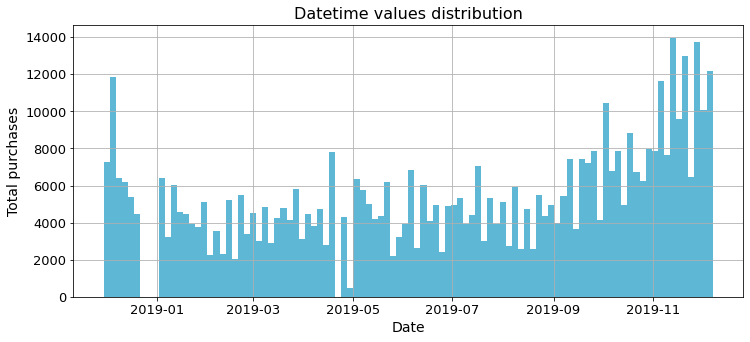

In [43]:
data['invoice_date'].hist(figsize = (12,5), bins = 100, color = '#5db7d5', xlabelsize = 13, ylabelsize = 13)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Total purchases', fontsize = 14)
plt.title('Datetime values distribution', fontsize = 16)
plt.show()

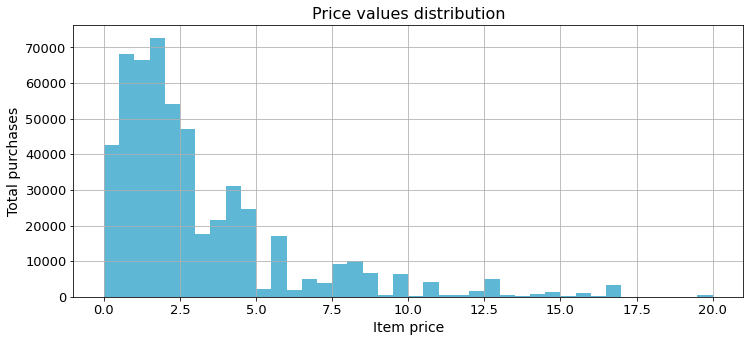

In [44]:
data['unit_price'].hist(range = (0, 20), figsize = (12,5), bins = 40, color = '#5db7d5', xlabelsize = 13, ylabelsize = 13)
plt.xlabel('Item price', fontsize = 14)
plt.ylabel('Total purchases', fontsize = 14)
plt.title('Price values distribution', fontsize = 16)
plt.show()

In [45]:
# group data by invoice:
invoice = data.groupby('invoice').agg({'quantity': 'sum', 'revenue': 'sum'})
invoice.head()

,quantity,revenue
invoice,,
536365,40,139.12
536366,12,22.20
536367,83,278.73
536368,15,70.05
536369,3,17.85


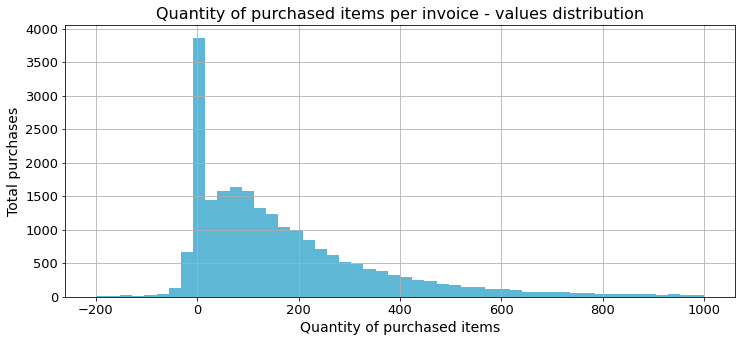

In [46]:
invoice['quantity'].hist(range = (-200,1000), 
                               figsize = (12,5), 
                               bins = 50, 
                               color = '#5db7d5', 
                               xlabelsize = 13, 
                               ylabelsize = 13)
plt.xlabel('Quantity of purchased items', fontsize = 14)
plt.ylabel('Total purchases', fontsize = 14)
plt.title('Quantity of purchased items per invoice - values distribution', fontsize = 16)
plt.show()

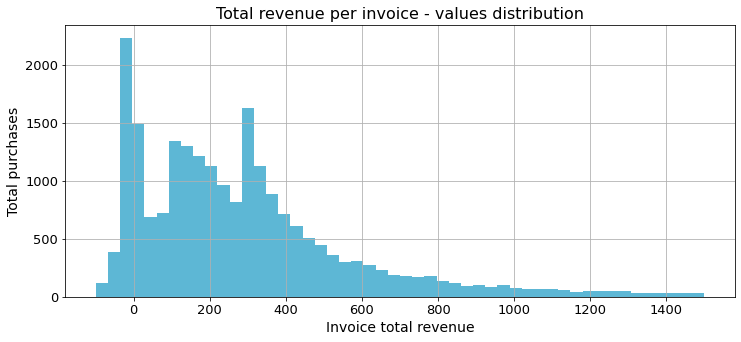

In [47]:
invoice['revenue'].hist(range = (-100,1500), 
                               figsize = (12,5), 
                               bins = 50, 
                               color = '#5db7d5', 
                               xlabelsize = 13, 
                               ylabelsize = 13)
plt.xlabel('Invoice total revenue', fontsize = 14)
plt.ylabel('Total purchases', fontsize = 14)
plt.title('Total revenue per invoice - values distribution', fontsize = 16)
plt.show()

In [48]:
# group data by stock_code:
items = data.groupby('stock_code').agg({'description': 'first', 
                                        'quantity': 'sum', 
                                        'unit_price': 'median', 
                                        'revenue': 'sum'
                                       }).round(2)

items.columns = ['description', 'quantity', 'avg_price', 'total_revenue']

In [49]:
# look at the top10 items by sales:
(items.sort_values('quantity', ascending = False)
 .head(10).style.format({'avg_price':'{:.2f}', 
                         'avg_revenue': '{:.2f}', 
                         'total_revenue': '{:.2f}'}).background_gradient(cmap = 'Blues'))

,description,quantity,avg_price,total_revenue
stock_code,,,,
22197,small popcorn holder,56427,0.85,50967.92
84077,world war 2 gliders asstd designs,53751,0.29,13560.09
85099B,jumbo bag red retrospot,47256,2.08,92175.79
84879,assorted colour bird ornament,36282,1.69,58792.42
21212,pack of 72 retrospot cake cases,36016,0.55,21047.07
85123A,white hanging heart t-light holder,35063,2.95,97838.45
23084,rabbit night light,30631,2.08,66661.63
22492,mini paint set vintage,26437,0.65,16810.42
22616,pack of 12 london tissues,26095,0.29,7967.82


In [50]:
# look at the top10 items by revenue:
(items.sort_values('total_revenue', ascending = False)
 .head(10).style.format({'avg_price':'{:.2f}', 
                         'avg_revenue': '{:.2f}', 
                         'total_revenue': '{:.2f}'}).background_gradient(cmap = 'Blues'))

,description,quantity,avg_price,total_revenue
stock_code,,,,
22423,regency cakestand 3 tier,12996,12.75,164459.49
47566,party bunting,18006,4.95,98243.88
85123A,white hanging heart t-light holder,35063,2.95,97838.45
85099B,jumbo bag red retrospot,47256,2.08,92175.79
23084,rabbit night light,30631,2.08,66661.63
22086,paper chain kit 50's christmas,18876,2.95,63715.24
84879,assorted colour bird ornament,36282,1.69,58792.42
79321,chilli lights,10222,5.75,53746.66
22502,picnic basket wicker small,1862,5.95,51023.52


In [51]:
# look at the top10 most expensive items:
(items.sort_values('avg_price', ascending = False).head(10).style.format({'avg_price':'{:.2f}', 
                         'avg_revenue': '{:.2f}', 
                         'total_revenue': '{:.2f}'}).background_gradient(cmap = 'Blues'))

,description,quantity,avg_price,total_revenue
stock_code,,,,
22827,rustic seventeen drawer sideboard,32,165.00,5000.00
22828,regency mirror with shutters,10,165.00,1530.00
22656,vintage blue kitchen cabinet,20,125.00,2885.00
22655,vintage red kitchen cabinet,50,125.00,6394.50
22823,chest natural wood 20 drawers,24,125.00,2745.00
22826,love seat antique white metal,54,85.00,5692.50
22016,dotcomgiftshop gift voucher £100.00,1,83.33,83.33
21769,vintage post office cabinet,11,66.36,607.65
22929,school desk and chair,16,65.00,1004.75


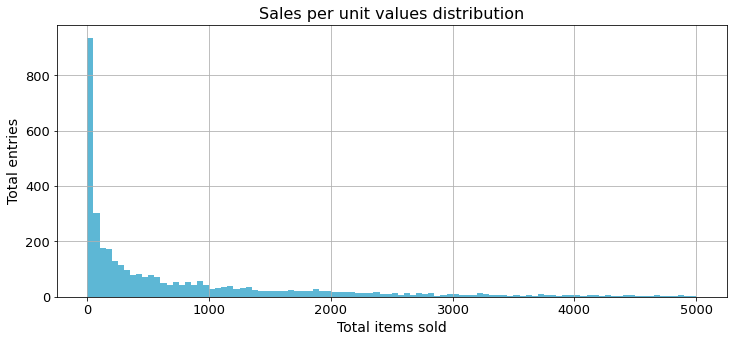

In [52]:
items['quantity'].hist(range = (0,5000), 
                               figsize = (12,5), 
                               bins = 100, 
                               color = '#5db7d5', 
                               xlabelsize = 13, 
                               ylabelsize = 13)
plt.xlabel('Total items sold', fontsize = 14)
plt.ylabel('Total entries', fontsize = 14)
plt.title('Sales per unit values distribution', fontsize = 16)
plt.show()

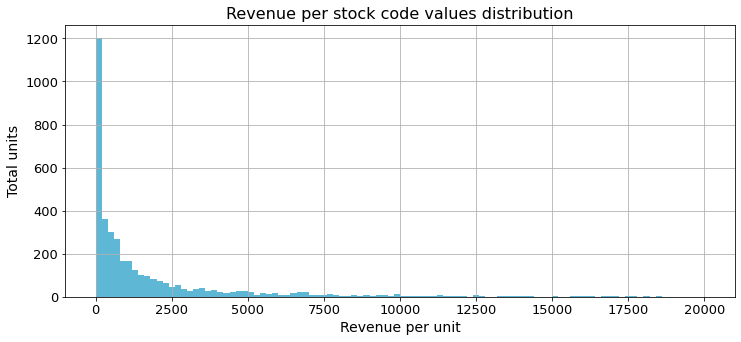

In [53]:
items['total_revenue'].hist(range = (0,20000), 
                               figsize = (12,5), 
                               bins = 100, 
                               color = '#5db7d5', 
                               xlabelsize = 13, 
                               ylabelsize = 13)
plt.xlabel('Revenue per unit', fontsize = 14)
plt.ylabel('Total units', fontsize = 14)
plt.title('Revenue per stock code values distribution', fontsize = 16)
plt.show()

#### <font color = 'blue'>Notes:</font>

* **Overall data**:
    * Quantity histogram looks irregular. Most of the values fall between 0 and 10 units per puchase.
    * Unit prices distribution looks more like a normal one, though it still has many irregularities. Most of the prices fall between 0 and 5.
    * Date histogram looks quite predictable, with seasonal rise in sales before the winter holidays, and with no sales at all on winter holidays themselves and on Easter.
    
<br>

* **Invoices**:
    * Average item quantity per invoice look quite consistent, the distribution shows a long tail of high values and a high peak of values somewhere between 0 and 10.
    * Total revenue for invoice falls within the normal line. The lower the revenue, the higher number of invoices, with most of the invoices fall between 0-100 revenue range.
    
<br>

* **Units** (and this is where the things start to get interesting):
    * Quantity.<br>
      Small popcorn holder has the higher sales amount (56427), but it takes only 9-th place for the total revenue (47962.95).<br>
      Sales per unit distribution has very long tail and very high peak on the lowest values, with most of the values placed between 0 and 1000.<br>
    * Revenue:<br>
      3-tier regency cake stand number of sales doesn't even get in the top 10, but it's on the top of the list for revenue (12996). <br>
      Revenue distribution also has very long tail and high peak at lowest values, with most of the values placed between 0 and 5000.<br>
    * Average unit price:<br>
      In top 10 items by price I still see some technical items that distort the data. But none of the genuine items that got in this list appear in the lists of top sales and top revenue. Judging by histograms, I would say those items are placed slightly above the average.<br>
      

[Table of contents](#Table-of-contents)

## Remove outliers and look at item histograms again:

In [54]:
# check percentiles:
for column in ['quantity', 'unit_price']:
    print('{} percentiles:'.format(column.capitalize()))
    print('0.5%: {:.2f}, 1%: {:.2f}, 96%: {:.2f}, 99%: {:.2f}, 99.999%: {:.2f}'.format(
        np.percentile(data[column], 0.5), 
        np.percentile(data[column], 1), 
        np.percentile(data[column], 96),
        np.percentile(data[column], 99), 
        np.percentile(data[column], 99.999)))

Quantity percentiles:
0.5%: -5.00, 1%: -1.00, 96%: 36.00, 99%: 100.00, 99.999%: 3163.31
Unit_price percentiles:
0.5%: 0.19, 1%: 0.29, 96%: 10.79, 99%: 16.63, 99.999%: 295.00


In [55]:
# filter outliers:
data_upd = data.query('0 < quantity < 2500 & 0 < unit_price < 1000')

# create items table with the filtered data:
items_upd = data_upd.groupby('stock_code').agg({'description': 'first', 
                                        'quantity': 'sum', 
                                        'unit_price': 'median', 
                                        'revenue': 'sum'
                                       }).round(2)

items_upd.columns = ['description', 'quantity', 'avg_price', 'total_revenue']

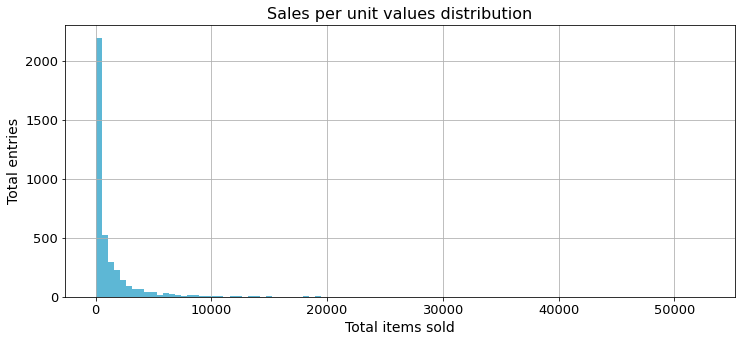

In [56]:
items_upd['quantity'].hist(figsize = (12,5), 
                               bins = 100, 
                               color = '#5db7d5', 
                               xlabelsize = 13, 
                               ylabelsize = 13)
plt.xlabel('Total items sold', fontsize = 14)
plt.ylabel('Total entries', fontsize = 14)
plt.title('Sales per unit values distribution', fontsize = 16)
plt.show()

In [57]:
# see what items have highest sales:
items_upd.sort_values('quantity', ascending = False).head()

,description,quantity,avg_price,total_revenue
stock_code,,,,
22197,small popcorn holder,52598,0.85,48238.47
85099B,jumbo bag red retrospot,48371,2.08,94159.81
84077,world war 2 gliders asstd designs,44679,0.29,11743.29
85123A,white hanging heart t-light holder,37641,2.95,104462.75
21212,pack of 72 retrospot cake cases,36396,0.55,21246.45


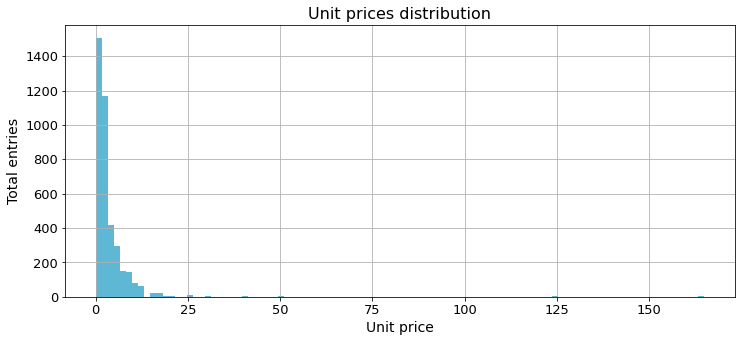

In [58]:
items_upd['avg_price'].hist(figsize = (12,5), 
                               bins = 100, 
                               color = '#5db7d5', 
                               xlabelsize = 13, 
                               ylabelsize = 13)
plt.xlabel('Unit price', fontsize = 14)
plt.ylabel('Total entries', fontsize = 14)
plt.title('Unit prices distribution', fontsize = 16)
plt.show()

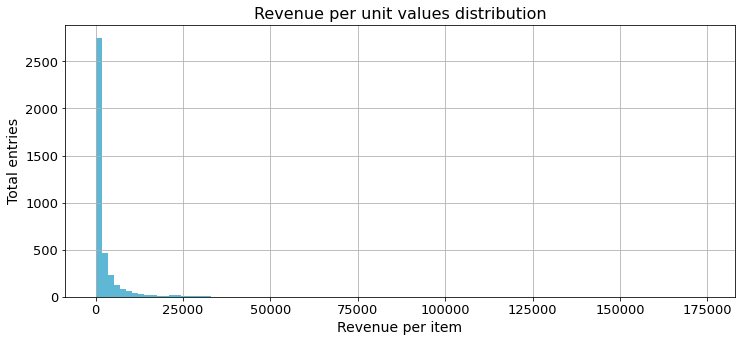

In [59]:
items_upd['total_revenue'].hist(figsize = (12,5), 
                               bins = 100, 
                               color = '#5db7d5', 
                               xlabelsize = 13, 
                               ylabelsize = 13)
plt.xlabel('Revenue per item', fontsize = 14)
plt.ylabel('Total entries', fontsize = 14)
plt.title('Revenue per unit values distribution', fontsize = 16)
plt.show()

In [60]:
items_upd.sort_values('total_revenue', ascending = False).head()

,description,quantity,avg_price,total_revenue
stock_code,,,,
22423,regency cakestand 3 tier,13851,12.75,174156.54
85123A,white hanging heart t-light holder,37641,2.95,104462.75
47566,party bunting,18283,4.95,99445.23
85099B,jumbo bag red retrospot,48371,2.08,94159.81
23084,rabbit night light,30739,2.08,66870.03


#### <font color = 'blue'>Notes:</font>

To find data relationship and possible correlation between existing columns or their derivatives, I created new data slice without the highest and lowest percentiles of the prices and the sales, so they won't distort further analysis.

[Table of contents](#Table-of-contents)

## Data relationship and correlations

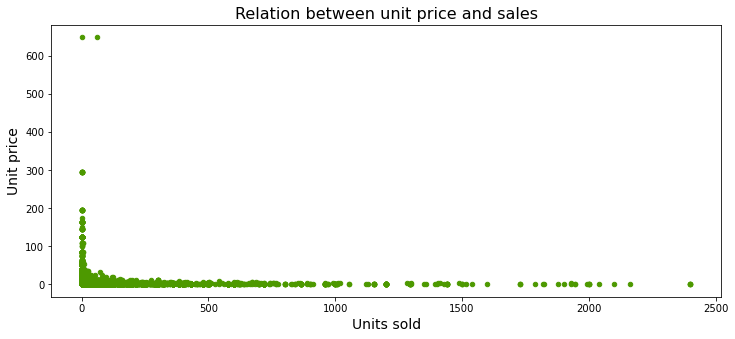

In [61]:
data_upd.plot(kind = 'scatter', 
          x = 'quantity', 
          y = 'unit_price', 
          figsize = (12,5), 
          color = '#4d9900')
plt.xlabel('Units sold', fontsize = 14)
plt.ylabel('Unit price', fontsize = 14)
plt.title('Relation between unit price and sales', fontsize = 16)
plt.show()

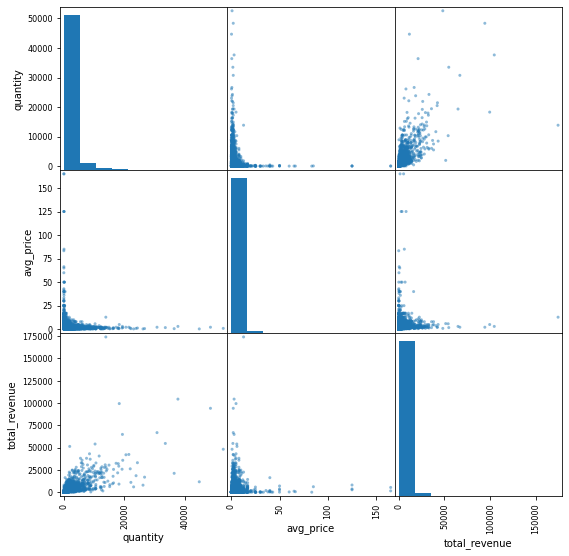

In [62]:
pd.plotting.scatter_matrix(items_upd, figsize = (9,9))
plt.show()

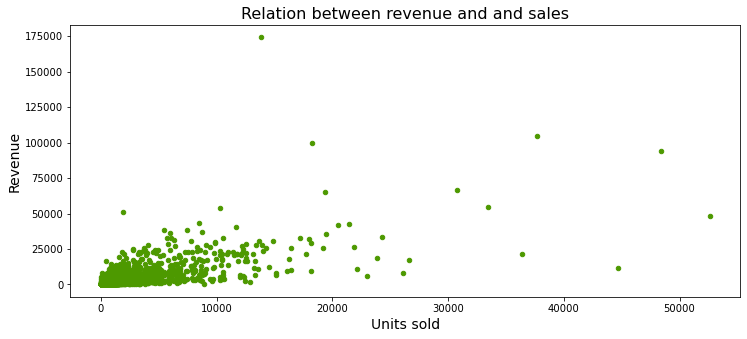

In [63]:
items_upd.plot(kind = 'scatter', 
          x = 'quantity', 
          y = 'total_revenue', 
          figsize = (12,5), 
          color = '#4d9900')
plt.xlabel('Units sold', fontsize = 14)
plt.ylabel('Revenue', fontsize = 14)
plt.title('Relation between revenue and and sales', fontsize = 16)
plt.show()

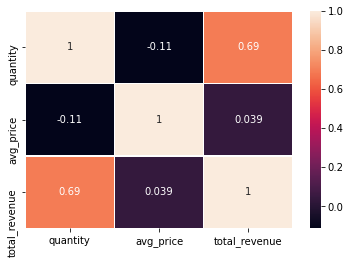

In [64]:
sns.heatmap(items_upd.corr(), annot = True, linewidths = .4)
plt.show()

#### <font color = 'blue'>Notes:</font>

* The lower item's price, the more sales it has.
* Items that are sold in lower quantities are more expensive.
* Cheaper items have higher revenue, because their sales are higher.


According to this, cheaper items should be more profitable than expensive ones.

[Table of contents](#Table-of-contents)

# Product Analysis

## Sort products by categories: variety-based.

In [65]:
stock_code_num = []
for item in items_upd.index:
    if item.isdigit():
        stock_code_num.append(item)
    elif item.isalpha(): 
        stock_code_num.append(item)
    else:
        i = ''
        for letter in item:
            if letter.isdigit():
                i += letter
        stock_code_num.append(i)

In [66]:
items_upd['item_type_code'] = stock_code_num
items_upd.item_type_code.value_counts()[items_upd.item_type_code.value_counts() > 2].describe().round(2)

count    143.00
mean       4.29
std        2.34
min        3.00
25%        3.00
50%        4.00
75%        5.00
max       24.00
Name: item_type_code, dtype: float64

In [67]:
len(items_upd.item_type_code.value_counts()[items_upd.item_type_code.value_counts() > 2])

143

In [68]:
# add a column indicating how many items of this type there are:
items_upd = items_upd.reset_index().merge(items_upd['item_type_code'].value_counts().reset_index(), 
                                      left_on = 'item_type_code', 
                                      right_on = 'index',
                                      how = 'left')
items_upd = items_upd.drop(columns = ['index']).rename(
    columns = {'item_type_code_x':'item_type_code', 'item_type_code_y':'type_count'})

items_upd.head()

,stock_code,description,quantity,avg_price,total_revenue,item_type_code,type_count
0,10002,inflatable political globe,860,0.85,759.89,10002,1
1,10080,groovy cactus inflatable,303,0.39,119.09,10080,1
2,10120,doggy rubber,192,0.21,40.32,10120,1
3,10123C,hearts wrapping tape,5,0.65,3.25,10123,1
4,10124A,spots on red bookcover tape,16,0.42,6.72,10124,2


In [69]:
# create list of item types that have a variety (2 items or more):
item_types = items_upd.item_type_code.value_counts()[items_upd.item_type_code.value_counts() > 2].index
item_types

Index(['90214', '85049', '84596', '46776', '84968', '84509', '84997', '82613',
       '84510', '90036',
       ...
       '47566', '72799', '90179', '72351', '90122', '47590', '35597', '84206',
       '84796', '90181'],
      dtype='object', length=143)

In [70]:
# check what share of items belongs to identified ranges:
len(items_upd.query('type_count > 1')) / len(items_upd)

0.23198773633111905

In [71]:
# check profit share of items that belong to ranges out ot total profit:
items_upd.query('type_count > 1').total_revenue.sum() / items_upd.total_revenue.sum()

0.09386480833371133

In [72]:
# get the list of most varied items:
items_upd.groupby('item_type_code').agg(
    {'description':'first', 
     'avg_price': 'mean', 
     'type_count': 'first',
     'total_revenue': 'sum'}).reset_index().sort_values('type_count', ascending = False).head(10)

,item_type_code,description,avg_price,type_count,total_revenue
3291,90214,"letter ""a"" bling key ring",0.807500,24,896.79
3014,85049,traditional christmas ribbons,1.857143,14,14712.05
2824,84596,small dolly mix design orange bowl,1.468182,11,6869.50
2968,84968,set of 16 vintage rose cutlery,17.687000,10,12266.38
2557,46776,woven bubble gum cushion cover,4.130000,10,3432.07
2795,84509,set of 4 english rose placemats,5.312222,9,7006.48
2986,84997,green 3 piece polkadot cutlery set,6.220000,8,69168.97
2735,82613,"metal sign,cupcake single hook",1.774286,7,1595.04
2842,84660,white stitched wall clock,4.291667,6,2389.89
3162,90059,diamante hair grip pack/2 crystal,1.650000,6,243.35


In [73]:
# check how many items with high variety do we have:
items_upd.type_count.value_counts()

1     3006
2      294
4      188
3      177
5       90
6       66
24      24
10      20
14      14
11      11
9        9
8        8
7        7
Name: type_count, dtype: int64

In [74]:
# compare it to the list of most profitable items 
items_upd.groupby('item_type_code').agg(
    {'description':'first', 
     'avg_price': 'mean', 
     'type_count': 'first',
     'total_revenue': 'sum'}).reset_index().sort_values('total_revenue', ascending = False).head(10)

,item_type_code,description,avg_price,type_count,total_revenue
1284,22423,regency cakestand 3 tier,12.750000,1,174156.54
3036,85099,jumbo bag red retrospot,2.825000,4,154935.20
2582,47566,party bunting,6.063333,3,112371.65
3048,85123,white hanging heart t-light holder,4.790000,2,106415.23
2986,84997,green 3 piece polkadot cutlery set,6.220000,8,69168.97
1916,23084,rabbit night light,2.080000,1,66870.03
980,22086,paper chain kit 50's christmas,2.950000,1,64875.59
2933,84879,assorted colour bird ornament,1.690000,1,54751.62
2705,79321,chilli lights,5.750000,1,54096.36
1358,22502,picnic basket wicker small,5.950000,1,51408.77


In [75]:
items_upd.groupby('item_type_code').total_revenue.sum().median()

964.225

In [76]:
# add 'varied' column to the dataset - it may be useful later for machine learning clustering:

items_upd['variety'] = items_upd['type_count'].apply(lambda x: True if x > 1 else False)
items_upd.head()

,stock_code,description,quantity,avg_price,total_revenue,item_type_code,type_count,variety
0,10002,inflatable political globe,860,0.85,759.89,10002,1,False
1,10080,groovy cactus inflatable,303,0.39,119.09,10080,1,False
2,10120,doggy rubber,192,0.21,40.32,10120,1,False
3,10123C,hearts wrapping tape,5,0.65,3.25,10123,1,False
4,10124A,spots on red bookcover tape,16,0.42,6.72,10124,2,True


In [77]:
items_upd.query('variety == True').describe()

,quantity,avg_price,total_revenue,type_count
count,908.000000,908.000000,908.000000,908.000000
mean,475.976872,3.669493,1031.836443,4.409692
std,2366.677687,3.959544,6187.612352,3.960889
min,1.000000,0.100000,0.830000,2.000000
25%,11.000000,1.250000,30.090000,2.000000
50%,46.000000,2.550000,105.495000,3.000000
75%,270.250000,4.950000,479.247500,5.000000
max,48371.000000,49.950000,104462.750000,24.000000


In [78]:
items_upd.query('variety == False').describe()

,quantity,avg_price,total_revenue,type_count
count,3006.000000,3006.000000,3006.000000,3006.0
mean,1642.613107,3.615951,3008.831966,1.0
std,3162.176691,7.622677,6420.289345,0.0
min,1.000000,0.000000,0.000000,1.0
25%,131.000000,1.027500,280.607500,1.0
50%,591.500000,2.080000,1016.050000,1.0
75%,1816.250000,3.750000,2971.812500,1.0
max,52598.000000,165.000000,174156.540000,1.0


#### <font color = 'blue'>Notes:</font>

In this dataset same items with different properties (paper parasols that come in different colors, for example) go by almost same stock code: their stock code has numeric identifier that is the same for all this item, and the code ends with some letter, which is different for every color (or other property of the item). If we continue with the example of the parasols, pink paper parasol and blue paper parasol have codes of 15044A and 15044B, accordingly.<br><br>
In this section I separated the numerical component of each stock code into a column named 'item_type_code'. With this approach I was able to find:<br><br>

* Most of the items are not varied. Only 23% of the dataset's items are varied.
* Varied items are less profitable: their share of profits is only 9%.
* Bling key ring have the highest variety (24 items). 
* Most of the varied items belong to lower variety range (2-4).
* Out of items with highest variety, only one has entered into top 10 items by revenue (3 piece polkadot cutlery set with total revenue of 73938.12). But if we compare most varied items to overall average, most of them are above the median revenue for item type.


[Table of contents](#Table-of-contents)

## Sort products by categories: description-based.

In [79]:
"""
Function designed input: description (string).
Function output: list of words which contain letters only and are longer than 2 symbols.
"""

def filter_description(value):
    result = []
    for word in value.split():
        if (len(word) > 2) & word.isalpha():
            result.append(word)
        else:
            pass
    if len(result) > 0:
        return result
    else:
        return 'no keywords'


In [80]:
# copy the items dataframe
items_by_desc = items_upd

# add the keywords column:
items_by_desc['keyword'] = items_by_desc['description'].apply(filter_description)

# split each keyword list into separate rows
items_by_desc = items_by_desc.explode('keyword')

items_by_desc.head()

,stock_code,description,quantity,avg_price,total_revenue,item_type_code,type_count,variety,keyword
0,10002,inflatable political globe,860,0.85,759.89,10002,1,False,inflatable
0,10002,inflatable political globe,860,0.85,759.89,10002,1,False,political
0,10002,inflatable political globe,860,0.85,759.89,10002,1,False,globe
1,10080,groovy cactus inflatable,303,0.39,119.09,10080,1,False,groovy
1,10080,groovy cactus inflatable,303,0.39,119.09,10080,1,False,cactus


In [81]:
# check if there are any items with no keywords:
items_by_desc.query('keyword == "no keywords"')

,stock_code,description,quantity,avg_price,total_revenue,item_type_code,type_count,variety,keyword
2926,84247G,"decoupage,greeting card,",357,0.42,158.63,84247,5,True,no keywords


In [82]:
# group data by keywords:
keyword_data = items_by_desc.groupby('keyword').agg({'stock_code': 'count', 
                                                     'quantity': ['mean', 'sum'],
                                                     'total_revenue': ['mean', 'sum']}).reset_index().round(2)
# rename columns:
keyword_data.columns = ['keyword', 'count', 'avg_sales', 'total_sales', 'avg_revenue', 'total_revenue']

# look at keywords that appear in largest number of descriptions:
keyword_data.sort_values('count', ascending = False).head(10).style.highlight_max(color = '#b3ff66')

,keyword,count,avg_sales,total_sales,avg_revenue,total_revenue
1525,set,322,1443.970000,464959,3297.100000,1061667.510000
1295,pink,304,904.310000,274910,1498.380000,455506.610000
812,heart,222,1783.500000,395938,3138.680000,696786.330000
149,blue,215,710.490000,152756,1198.300000,257634.140000
1860,vintage,198,1611.550000,319086,3202.300000,634054.730000
1413,red,196,2218.130000,434754,4560.050000,893770.370000
59,bag,160,3770.290000,603246,6872.280000,1099565.430000
338,christmas,151,2195.220000,331478,3122.110000,471438.290000
744,glass,148,995.310000,147306,1579.980000,233837.770000
1889,white,136,1406.440000,191276,3707.400000,504206.060000


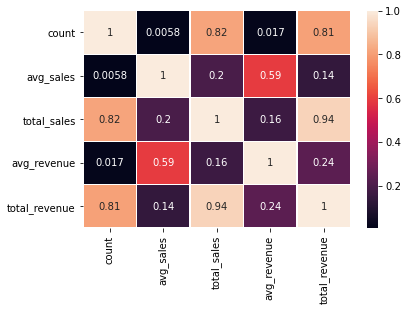

In [83]:
sns.heatmap(keyword_data.corr(), annot = True, linewidths = .4)
plt.show()

In [84]:
# look at keywords that have largest sales on the average:
keyword_data.sort_values('avg_sales', ascending = False).head(10).style.highlight_max(color = '#b3ff66')

,keyword,count,avg_sales,total_sales,avg_revenue,total_revenue
1871,war,1,44679.000000,44679,11743.290000,11743.290000
747,gliders,1,44679.000000,44679,11743.290000,11743.290000
1192,ornament,1,33482.000000,33482,54751.620000,54751.620000
1339,popcorn,2,26811.500000,53623,25054.690000,50109.380000
192,brocade,1,23020.000000,23020,6025.950000,6025.950000
489,designs,2,22419.000000,44838,5936.780000,11873.560000
1247,patterns,1,20485.000000,20485,42030.340000,42030.340000
655,flytrap,1,16244.000000,16244,17927.450000,17927.450000
1916,world,3,14987.000000,44961,4346.750000,13040.250000
803,harmonica,2,14889.500000,29779,18316.940000,36633.890000


In [85]:
# look at keywords that bring largest profits:
keyword_data.sort_values('avg_revenue', ascending = False).head(10).style.highlight_max(color = '#b3ff66')

,keyword,count,avg_sales,total_sales,avg_revenue,total_revenue
236,cakestand,2,7547.500000,15095,93617.660000,187235.320000
1192,ornament,1,33482.000000,33482,54751.620000,54751.620000
324,chilli,1,10302.000000,10302,54096.360000,54096.360000
1247,patterns,1,20485.000000,20485,42030.340000,42030.340000
390,come,1,5487.000000,5487,38133.640000,38133.640000
1727,sympathy,1,5740.000000,5740,32973.440000,32973.440000
28,angels,1,9461.000000,9461,26425.580000,26425.580000
1339,popcorn,2,26811.500000,53623,25054.690000,50109.380000
1624,spice,1,5966.000000,5966,24436.260000,24436.260000
1745,teacup,3,7643.330000,22930,23085.990000,69257.980000


In [86]:
keyword_data.describe().round(2)

,count,avg_sales,total_sales,avg_revenue,total_revenue
count,1930.00,1930.00,1930.00,1930.00,1930.00
mean,8.03,1316.91,10887.97,2357.50,20463.91
std,20.33,2598.90,36248.75,4469.93,68502.59
min,1.00,1.00,1.00,0.00,0.00
25%,1.00,145.06,281.00,285.16,577.98
50%,2.00,580.44,1613.50,1042.70,2703.74
75%,6.00,1524.98,6714.50,2675.82,11433.97
max,322.00,44679.00,603246.00,93617.66,1099565.43


In [87]:
# check what is the share of keywords that appear 25 times or more out of overall description words:
keyword_data.sort_values('avg_revenue', ascending = False)[0:25]['count'].sum() / keyword_data['count'].sum()

0.005803830528148578

In [88]:
# check what share of revenue do the items that belong to most profitable keywords (not including sets) take:
keyword_data.sort_values('avg_revenue', ascending = False)[0:25]['total_revenue'].sum() / keyword_data['total_revenue'].sum()

0.05620870389865099

#### <font color = 'blue'>Notes:</font>

After filtering out the descriptions words that contain any additional symbols and words with 1 or 2 symbols, I grouped the data by keywords and checked the key metrics. I found that:
* Total sales and total revenue are highly correlated with number of items that have this keyword in stock.
* Items with highest average sales and highest average profits do not appear in the list of the most popular keywords (if we look at top keywords by number of their occurence). I believe it will be worthwile to invest into marketing of some items from these lists.

[Table of contents](#Table-of-contents)

## Build machine learning model to categorize items into clusters

In [89]:
# check correlations on items data:
items_upd.corr()

,quantity,avg_price,total_revenue,type_count,variety
quantity,1.000000,-0.113091,0.694596,-0.100770,-0.162198
avg_price,-0.113091,1.000000,0.039199,-0.007850,0.003254
total_revenue,0.694596,0.039199,1.000000,-0.083904,-0.129984
type_count,-0.100770,-0.007850,-0.083904,1.000000,0.602461
variety,-0.162198,0.003254,-0.129984,0.602461,1.000000


In [90]:
# create a dictionary of keywords:
keywords = dict(zip(keyword_data['keyword'].tolist(), keyword_data['count'].tolist()))

In [91]:
"""
A function that checks every word in the description and returns popularity index of the key
(how many times this key appears in the dataset).
"""
def top_keywords(description):
    result = []
    for word in description.split():
        if word in keywords:
            result.append(keywords[word])
        else:
            pass
    if len(result) == 0:
        result.append(0)
    return result

In [92]:
# add columns with minimum, maximum, mean and median popularity for each item:
items_upd['min'] = (items_upd['description'].apply(top_keywords)).apply(min)
items_upd['median'] = (items_upd['description'].apply(top_keywords)).apply(median).astype(int)
items_upd['max'] = (items_upd['description'].apply(top_keywords)).apply(max)

In [93]:
items_upd.head()

,stock_code,description,quantity,avg_price,total_revenue,item_type_code,type_count,variety,keyword,min,median,max
0,10002,inflatable political globe,860,0.85,759.89,10002,1,False,"[inflatable, political, globe]",1,1,2
1,10080,groovy cactus inflatable,303,0.39,119.09,10080,1,False,"[groovy, cactus, inflatable]",2,2,3
2,10120,doggy rubber,192,0.21,40.32,10120,1,False,"[doggy, rubber]",1,2,4
3,10123C,hearts wrapping tape,5,0.65,3.25,10123,1,False,"[hearts, wrapping, tape]",2,18,30
4,10124A,spots on red bookcover tape,16,0.42,6.72,10124,2,True,"[spots, red, bookcover, tape]",2,12,196


In [94]:
# check correlations again before deciding what columns I use for my clustering model:
items_upd.corr()

,quantity,avg_price,total_revenue,type_count,variety,min,median,max
quantity,1.000000,-0.113091,0.694596,-0.100770,-0.162198,0.066980,0.083331,0.012112
avg_price,-0.113091,1.000000,0.039199,-0.007850,0.003254,-0.030593,-0.021416,-0.015724
total_revenue,0.694596,0.039199,1.000000,-0.083904,-0.129984,0.053556,0.049585,0.020453
type_count,-0.100770,-0.007850,-0.083904,1.000000,0.602461,0.123952,0.054326,-0.011744
variety,-0.162198,0.003254,-0.129984,0.602461,1.000000,0.115020,0.078587,0.052989
min,0.066980,-0.030593,0.053556,0.123952,0.115020,1.000000,0.464745,0.130861
median,0.083331,-0.021416,0.049585,0.054326,0.078587,0.464745,1.000000,0.456642
max,0.012112,-0.015724,0.020453,-0.011744,0.052989,0.130861,0.456642,1.000000


In [95]:
# separate relevant data for machine learning model:
items_ml = items_upd[['stock_code', 
                      'quantity', 
                      'avg_price', 
                      'total_revenue', 
                      'variety', 
                      'min', 'median', 'max']].set_index('stock_code')

In [96]:
items_ml.head()

,quantity,avg_price,total_revenue,variety,min,median,max
stock_code,,,,,,,
10002,860,0.85,759.89,False,1,1,2
10080,303,0.39,119.09,False,2,2,3
10120,192,0.21,40.32,False,1,2,4
10123C,5,0.65,3.25,False,2,18,30
10124A,16,0.42,6.72,True,2,12,196


In [97]:
# standartize the data
scaler = StandardScaler()
items_st = scaler.fit_transform(items_ml)

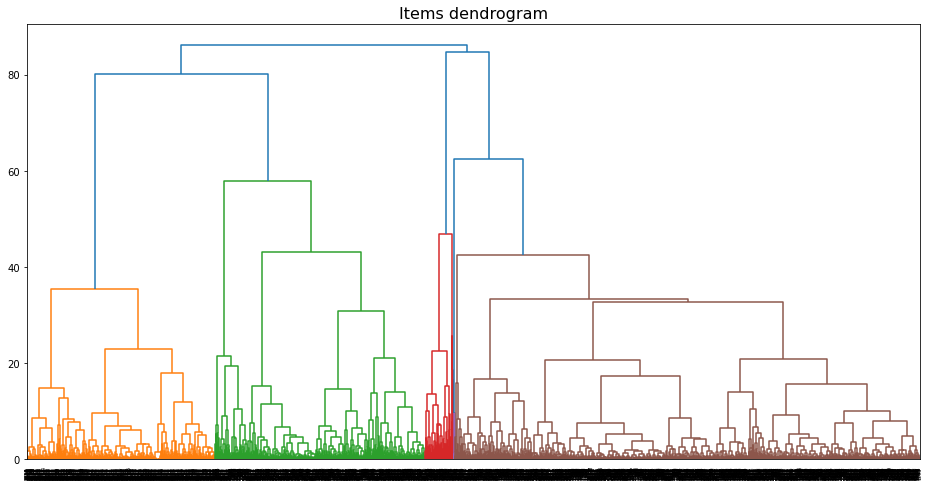

In [98]:
# create a dendrogram:
linked = linkage(items_st, method = 'ward')

plt.figure(figsize = (16,8))
dendrogram(linked, orientation = 'top')
plt.title('Items dendrogram', fontsize = 16)
plt.show()

In [99]:
# Train KMeans model
model_km = KMeans(n_clusters = 6)

# get labels
labels_km = model_km.fit_predict(items_st)

In [100]:
items_upd['cluster_labels'] = labels_km

items_upd['cluster_labels'].value_counts()

4    1743
3     996
2     812
1     216
0     137
5      10
Name: cluster_labels, dtype: int64

In [101]:
items_upd.head()

,stock_code,description,quantity,avg_price,total_revenue,item_type_code,type_count,variety,keyword,min,median,max,cluster_labels
0,10002,inflatable political globe,860,0.85,759.89,10002,1,False,"[inflatable, political, globe]",1,1,2,4
1,10080,groovy cactus inflatable,303,0.39,119.09,10080,1,False,"[groovy, cactus, inflatable]",2,2,3,4
2,10120,doggy rubber,192,0.21,40.32,10120,1,False,"[doggy, rubber]",1,2,4,4
3,10123C,hearts wrapping tape,5,0.65,3.25,10123,1,False,"[hearts, wrapping, tape]",2,18,30,4
4,10124A,spots on red bookcover tape,16,0.42,6.72,10124,2,True,"[spots, red, bookcover, tape]",2,12,196,2


In [102]:
# study the resulting clusters:

clusters = items_upd.groupby('cluster_labels').agg({
            'stock_code': 'count', 
            'quantity':'mean', 
            'avg_price': 'mean', 
            'total_revenue': ['mean', 'sum'], 
            'item_type_code': 'nunique', 
            'variety': 'mean'})

clusters.columns = ['total_items', 'avg_sales', 'avg_price', 'avg_revenue', 'total_revenue', 'unique_items', 'variety']

clusters.style.highlight_max(color = '#97DFA1').highlight_min(color = '#FCA965')

,total_items,avg_sales,avg_price,avg_revenue,total_revenue,unique_items,variety
cluster_labels,,,,,,,
0,137,12620.211679,2.627080,25543.940073,3499519.790000,135,0.058394
1,216,1153.967593,3.243611,1704.243380,368116.570000,173,0.356481
2,812,294.020936,3.545074,560.952771,455493.650000,281,1.000000
3,996,1198.288153,3.049337,2159.356697,2150719.270000,993,0.011044
4,1743,1124.019507,3.534446,1995.207499,3477646.670000,1743,0.000000
5,10,25.000000,106.464000,2996.043000,29960.430000,10,0.000000


In [103]:
clusters.median().round(2)

total_items          514.00
avg_sales           1138.99
avg_price              3.39
avg_revenue         2077.28
total_revenue    1303106.46
unique_items         227.00
variety                0.03
dtype: float64

## Look what items represent each cluster:

In [104]:
items_upd.query('cluster_labels == 0').head()

,stock_code,description,quantity,avg_price,total_revenue,item_type_code,type_count,variety,keyword,min,median,max,cluster_labels
12,15036,assorted colours silk fan,23826,0.83,18569.84,15036,1,False,"[assorted, colours, silk, fan]",2,6,57,0
80,17003,brocade ring purse,23020,0.29,6025.95,17003,1,False,"[brocade, ring, purse]",1,24,47,0
138,20668,disco ball christmas decoration,12883,0.12,1501.40,20668,1,False,"[disco, ball, christmas, decoration]",7,54,151,0
151,20685,doormat red retrospot,4088,7.95,28049.54,20685,1,False,"[doormat, red, retrospot]",28,95,196,0
167,20712,jumbo bag woodland animals,9773,2.08,22092.42,20712,1,False,"[jumbo, bag, woodland, animals]",4,26,160,0


In [105]:
items_upd.query('cluster_labels == 1').head()

,stock_code,description,quantity,avg_price,total_revenue,item_type_code,type_count,variety,keyword,min,median,max,cluster_labels
55,16169E,wrap 50's christmas,4563,0.42,1892.46,16169,5,True,"[wrap, christmas]",58,104,151,1
63,16206B,red purse with pink heart,7,1.25,8.75,16206,1,False,"[red, purse, with, pink, heart]",24,196,304,1
65,16207B,pink heart red handbag,29,2.46,76.14,16207,2,True,"[pink, heart, red, handbag]",14,209,304,1
111,17191A,rose flower candle+incense 16x16cm,4,3.75,15.00,17191,1,False,"[rose, flower]",109,111,113,1
142,20674,green polkadot bowl,1563,1.25,2016.23,20674,1,False,"[green, polkadot, bowl]",59,72,104,1


In [106]:
items_upd.query('cluster_labels == 2').head()

,stock_code,description,quantity,avg_price,total_revenue,item_type_code,type_count,variety,keyword,min,median,max,cluster_labels
4,10124A,spots on red bookcover tape,16,0.42,6.72,10124,2,True,"[spots, red, bookcover, tape]",2,12,196,2
5,10124G,army camo bookcover tape,17,0.42,7.14,10124,2,True,"[army, camo, bookcover, tape]",2,2,18,2
14,15044A,pink paper parasol,458,2.95,1439.02,15044,4,True,"[pink, paper, parasol]",18,77,304,2
15,15044B,blue paper parasol,321,2.95,946.83,15044,4,True,"[blue, paper, parasol]",18,77,215,2
16,15044C,purple paper parasol,313,2.95,1022.99,15044,4,True,"[purple, paper, parasol]",18,36,77,2


In [107]:
items_upd.query('cluster_labels == 3').head()

,stock_code,description,quantity,avg_price,total_revenue,item_type_code,type_count,variety,keyword,min,median,max,cluster_labels
29,16008,small folding scissor(pointed edge),2892,0.12,360.71,16008,1,False,"[small, folding]",14,64,114,3
36,16020C,clear stationery box set,84,0.83,69.90,16020,1,False,"[clear, stationery, box, set]",6,72,322,3
45,16151A,flowers handbag blue and orange,49,1.25,61.25,16151,1,False,"[flowers, handbag, blue, and, orange]",13,25,215,3
78,16259,piece of camo stationery set,3380,0.08,326.56,16259,1,False,"[piece, camo, stationery, set]",2,11,322,3
106,17129F,blue glass gems in bag,588,1.63,553.83,17129,1,False,"[blue, glass, gems, bag]",1,154,215,3


In [108]:
items_upd.query('cluster_labels == 4').head()

,stock_code,description,quantity,avg_price,total_revenue,item_type_code,type_count,variety,keyword,min,median,max,cluster_labels
0,10002,inflatable political globe,860,0.85,759.89,10002,1,False,"[inflatable, political, globe]",1,1,2,4
1,10080,groovy cactus inflatable,303,0.39,119.09,10080,1,False,"[groovy, cactus, inflatable]",2,2,3,4
2,10120,doggy rubber,192,0.21,40.32,10120,1,False,"[doggy, rubber]",1,2,4,4
3,10123C,hearts wrapping tape,5,0.65,3.25,10123,1,False,"[hearts, wrapping, tape]",2,18,30,4
6,10125,mini funky design tapes,1295,0.85,993.99,10125,1,False,"[mini, funky, design, tapes]",1,33,124,4


In [109]:
items_upd.query('cluster_labels == 5').head()

,stock_code,description,quantity,avg_price,total_revenue,item_type_code,type_count,variety,keyword,min,median,max,cluster_labels
794,21769,vintage post office cabinet,11,66.36,607.65,21769,1,False,"[vintage, post, office, cabinet]",5,16,198,5
945,22016,dotcomgiftshop gift voucher £100.00,1,83.33,83.33,22016,1,False,"[dotcomgiftshop, gift, voucher]",6,7,56,5
1530,22655,vintage red kitchen cabinet,60,125.00,8125.00,22655,1,False,"[vintage, red, kitchen, cabinet]",22,111,198,5
1531,22656,vintage blue kitchen cabinet,26,125.00,3685.00,22656,1,False,"[vintage, blue, kitchen, cabinet]",22,112,215,5
1692,22823,chest natural wood 20 drawers,24,125.00,2745.00,22823,1,False,"[chest, natural, wood, drawers]",6,9,39,5


#### <font color = 'blue'>Notes:</font>

The items was divided into 6 clusters. While grouping them, I chose to calculate mostly mean values, to see which clusters include the extreme values. Clusters descriptions (in each one I also included recommended priority for further investment into those items):

* **Cluster 0**: (priority 5) <br>
    This cluster is defined by relatively low prices and revenue. Roughly 1/3 of it's items have variety.<br>
    * **Total** of 208 items (one of the smaller clusters).
    * **Average items sold** 1130 (close to the median).
    * **Average unit price** is 3.31 (close to the median).
    * **Average revenue** is 1783 (second lowest). 
    * Number of **unique code types**: 165 out of 208, with average **variety** of 0.37 - second highest.
    * **Example items**: "inflatable political globe", "mini funky design tapes".


* **Cluster 1** (priority 6)<br>
    This cluster is defined by highest variety, but also by small sales and very low revenue.<br>
    * **Total** of 813 items (average-sized).
    * **Average items sold** 299 (second smallest on the sales amount).
    * **Average unit price** is 3.54 (close to the median).
    * **Average revenue** is 1623 (the lowest one). 
    * Number of **unique code types**: 281 out of 813, with average **variety** of 1.
    * **Example items**: "red purse with pink heart", "green polkadot bowl".
    


* **Cluster 2** (priority 3)<br>
    This cluster is defined by non-varied items with average sales and revenue. This cluster is the largest one.<br>
    * **Total** of 1748 items (the largest cluster).
    * **Average items sold** 1116 (close to the median).
    * **Average unit price** is 3.54 (close to the median).
    * **Average revenue** is 2049 (close to the median). 
    * Number of **unique code types**: 1748 out of 1748, with average **variety** of 0 - the lowest.
    * **Example items**: "assorted colours silk fan", "jumbo bag woodland animals".
    
    
* **Cluster 3** (priority 4)<br>
    This very small cluster contains most expensive items and it's revenue is higher than average. <br>
    * **Total** of 10 items (the smallest one).
    * **Average items sold** 25 (the lowest one).
    * **Average unit price** is 106 (the highest one).
    * **Average revenue** is 2851 (higher than median). 
    * Number of **unique code types**: 10 out of 10, with average **variety** of 0 - also the lowest.
    * **Example items**: "clear stationery box set", "flowers handbag blue and orange".
    
    
* **Cluster 4** (priority 1)<br>
    This small cluster contains cheapest items with extremely high sales and extremely high average revenue.<br>
    * **Total** of 137 items (second smallest).
    * **Average items sold** 12671 (ten times more than median).
    * **Average unit price** is 2.66 (the cheapest).
    * **Average revenue** is 25311 (also then times higher than median). 
    * Number of **unique code types**: 135 out of 137, with average **variety** of 0.05.
    * **Example items**: "vintage post office cabinet", "chest natural wood 20 drawers".
    
    
* **Cluster 5** (priority 2)<br>
    This cluster contains totally average items, with average sales and average profits. Compared to cluster 2, it's average price is slightly smaller, but sales and revenues are slightly bigger.<br>
    * **Total** of 999 items (second largest).
    * **Average items sold** 1204 (close to the median).
    * **Average unit price** is 3.01 (lower than the median).
    * **Average revenue** is 2195 (close to the median). 
    * Number of **unique code types**: 996 out of 999, with average **variety** of 0.01.
    * **Example items**: "army camo bookcover tape", "pink paper parasol".
    
    

[Table of contents](#Table-of-contents)

# Statistical data analysis

## Hypotheses to test:

1. There is no statistically significant difference in sales and revenues between varied and unique items.
2. There is no statistically significant difference in sales and revenues between the items with frequently and non-frequently occurring keywords.
3. There is no statistically significant difference in sales and revenues between the cheap and the expensive items.

In [110]:
# create a function for a/b testing:
def testing_average(sample1, sample2, alpha = 0.05):
    # checking normality:
    stat1, p1_norm = st.shapiro(sample1)
    stat2, p2_norm = st.shapiro(sample2)
    
    # if both normal:
    if p1_norm > alpha and p2_norm > alpha: 
        
        #check variance:
        statslev, p_levene = st.levene(sample1, sample2)
        
        if p_levene < alpha: ## variances not equal ##
            statist, p_value = st.ttest_ind(sample1, sample2, equal_var = False)
        else: ## variances equal ##
            statist, p_value = st.ttest_ind(sample1, sample2, equal_var = True)
    
    else: ## at least one of samples not normal ##
        statist, p_value = st.mannwhitneyu(sample1, sample2)
        
    print('P-value is: {:.7%}'.format(p_value))
    
    if p_value < alpha:
        print('Reject H0. The samples are not equal.')
    else:
        print('Cannot reject H0. There is not enough evidence to determine that samples are not equal.')

In [111]:
# prepare the dataset (already filtered for the outliers) for the testing:
test_data = data_upd[['stock_code', 'quantity', 'invoice_date', 'unit_price']]
test_data['revenue'] = test_data['quantity'] * test_data['unit_price']
test_data['week'] = test_data['invoice_date'].astype('datetime64[W]')

<ipython-input-111-3b27e9d4cd73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['revenue'] = test_data['quantity'] * test_data['unit_price']
<ipython-input-111-3b27e9d4cd73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['week'] = test_data['invoice_date'].astype('datetime64[W]')


In [112]:
test_data = test_data.merge(items_upd[['stock_code', 'variety', 'min', 'median', 'max', 'cluster_labels']], 
                            on = 'stock_code', how = 'left')

## Testing varied and unique items

In [113]:
# prepare the samples:
sample1_1 = test_data.query('variety == True').groupby('week').agg({'quantity':'mean', 'revenue': 'sum'})
sample1_2 = test_data.query('variety == False').groupby('week').agg({'quantity':'mean', 'revenue': 'sum'})

#### <font color = 'blue'>Null hypothesis (H0):  There is no statistically significant difference in revenues between varied and non-varied items.</font>
**Alternate hypothesis (H1) 1: There is a statistically significant difference in revenues between varied and non-varied items.**<br><br>

In [114]:
testing_average(sample1_1['revenue'], sample1_2['revenue'])

P-value is: 0.0000000%
Reject H0. The samples are not equal.


#### <font color = 'blue'>Null hypothesis (H0):  There is no statistically significant difference in sales between varied and non-varied items.</font>
**Alternate hypothesis (H1) 1: There is a statistically significant difference in sales between varied and non-varied items.**<br><br>

In [115]:
testing_average(sample1_1['quantity'], sample1_2['quantity'])

P-value is: 0.0014374%
Reject H0. The samples are not equal.


## Testing items with frequent and less frequent keywords:

In [116]:
# calculate average median frequency rate of keywords:

kr = items_upd['median'].median()

# prepare the samples
sample2_1 = test_data.query('median >= @kr').groupby('week').agg({'quantity':'mean', 'revenue': 'sum'})
sample2_2 = test_data.query('variety < @kr').groupby('week').agg({'quantity':'mean', 'revenue': 'sum'})

#### <font color = 'blue'>Null hypothesis (H0):  There is no statistically significant difference in revenues between items with frequent and less frequent keywords.</font>
**Alternate hypothesis (H1) 1: There is a statistically significant difference in revenues between varied items with frequent and less frequent keywords.**<br><br>

In [117]:
testing_average(sample2_1['revenue'], sample1_2['revenue'])

P-value is: 0.0000001%
Reject H0. The samples are not equal.


#### <font color = 'blue'>Null hypothesis (H0):  There is no statistically significant difference in sales between items with frequent and less frequent keywords.</font>
**Alternate hypothesis (H1) 1: There is a statistically significant difference in sales between varied items with frequent and less frequent keywords.**<br><br>

In [118]:
testing_average(sample2_1['quantity'], sample2_2['quantity'])

P-value is: 8.1174344%
Cannot reject H0. There is not enough evidence to determine that samples are not equal.


## Testing items in higher and lower price categories

In [119]:
test_data['unit_price'].describe()

count    522701.000000
mean          3.287788
std           4.464864
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max         649.500000
Name: unit_price, dtype: float64

In [120]:
# set the price limit for the samples:

pl = 2.1

# prepare the samples
sample3_1 = test_data.query('unit_price >= @pl').groupby('week').agg(
    {'quantity':'mean', 'unit_price': 'mean', 'revenue': 'sum'})
sample3_2 = test_data.query('unit_price < @pl').groupby('week').agg(
    {'quantity':'mean', 'unit_price': 'mean', 'revenue': 'sum'})

#### <font color = 'blue'>Null hypothesis (H0):  There is no statistically significant difference in revenues between items in higher and lower price categories.</font>
**Alternate hypothesis (H1) 1: There is a statistically significant difference in revenues between items in higher and lower price categories.**<br><br>

In [121]:
testing_average(sample3_1['revenue'], sample3_2['revenue'])

P-value is: 0.0004140%
Reject H0. The samples are not equal.


#### <font color = 'blue'>Null hypothesis (H0):  There is no statistically significant difference in sales between items in higher and lower price categories.</font>
**Alternate hypothesis (H1) 1: There is a statistically significant difference in sales between items in higher and lower price categories.**<br><br>

In [122]:
testing_average(sample3_1['quantity'], sample3_2['quantity'])

P-value is: 0.0000000%
Reject H0. The samples are not equal.


#### <font color = 'blue'>Notes:</font>

1. "There is no statistically significant difference between varied and unique items" hypothesis:<br>
    Both hypotheses were rejected. According to the tests, there is a difference in average sales and revenues between the varied and unique items.<br><br>
    
2. "There is no statistically significant difference in sales, prices and revenues between the items with frequently and non-frequently occurring keywords" hypothesis:<br>
    The limit between the samples was set at median of the median frequency rates of items.<br>
    The hypotheses about statistically significant difference in total revenue was rejected.<br>
    As for the sales, there was no statistically significant difference between the samples.<br><br>
    
3. "There is no statistically significant difference in sales and revenues between the cheap and the expensive items" hypothesis:<br>
    After looking at the prices description, I decided to set the limit between the samples close to median (at 2.1).
    Both hypotheses were rejected, there is a statistically significant difference between the samples.


[Table of contents](#Table-of-contents)

# Conclusion

In this project I had to analyze store's product range. The project consisted of 4 main parts:
1. **Preprocessing the data.**  I removed duplicated rows, treated missing values and identified weird values that needed special attention, like negative quantities.
2. **Exploratory data analysis.** On this stage I plotted graphs and studied the data to understand it better. As the second part of this stage, I also removed the outliers that could distort the further analysis. After examining the correlations, I could also see that the lower the price of the items, the higher the sales and the total revenue from it.
3. **Product analysis:**. I approached to this stage in three different ways, as described below:
    * Variety-based approach. <br>
      For this, I looked for similar items that had some distinct features, for example similar sets of cutlery in different colors. I was able to identify total of 143 varied items. Those items are making 24% of total dataset, but their profits are only 9% out of total. 
    * Description-based approach. <br>
      In this part I took all the descriptions from the dataset, filtered out too short words and words that had any non-alphabetic symbols in them, and grouped all the product by remaining keywords. Here I could see that items with highest sales and revenues did not have the most popular keys, which also pointed to the fact that the unique items (which have less common features with other items in stock) are more profitable.
    * Machine-learning based approach. <br>
      With the help of k-means model I divided all the items in stock into 6 separate clusters. I also labelled each cluster with priority, with priority 1 being the highest and priority 6 being the lowest. Here we can clearly see that the better the sales and total revenues are, the lower average prices of the cluster items: <br>
         * Cluster 4 (priority 1) - contains cheapest items with extremely high sales and extremely high average revenue.
         * Cluster 5 (priority 2) - contains totally average items, with average sales and average profits. Compared to cluster 2, it's average price is slightly smaller, but sales and revenues are slightly bigger.
         * Cluster 2 (priority 3) - is defined by non-varied items with average sales and revenue. This cluster is the largest one.
4. **Statistical analysis**. Here I used scientific approach to check whether my teories were correct. According to the results of this step, I can state that:
    * Items that identified as varied ones have lower sales and are less profitable than unique items. 
    * I could not prove that items with less frequent keywords have higher sales, but they definitely have higher revenues.
    * Cheaper items have higher sales and profits.

## Recommendations

In terms of unique items and varied items, I recommend to invest more into stock and marketing of more unique ones, while possibly looking to new original items that could interest the buyers.<br>
Also, while large and expensive items obviously bring their share of revenue, their sales are very low. Most of the sales - and the profits - come from smaller and cheaper items. For this type of the store it is critical to keep high turnover rate.

## Presentation:
* [Here](https://drive.google.com/file/d/1bUW9HPSZvyOdQfjeWu9eiXLzYXYDEI6G/view?usp=sharing).

[Table of contents](#Table-of-contents)